<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/ClassNotebooks/ImageProc_Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/cbishop4/MSE7530

Cloning into 'MSE7530'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 270 (delta 58), reused 4 (delta 4), pack-reused 165 (from 1)
Receiving objects: 100% (270/270), 10.35 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (119/119), done.


In [3]:
ht_file = '/content/MSE7530/sampledata/glass_adj.png'
phz_file = '/content/MSE7530/sampledata/glass_phase.png'
coins_file = '/content/MSE7530/sampledata/coins.png'

## Specific Image-Processing Packages we will use today

In [4]:
import skimage as ski
import scipy.ndimage as ndi

Use skimage to load files

In [5]:
height = ski.io.imread(ht_file)
phase = ski.io.imread(phz_file)
coins = ski.io.imread(coins_file)

## First we'll work with the height and phase images

Text(0.5, 1.0, 'AFM Phase')

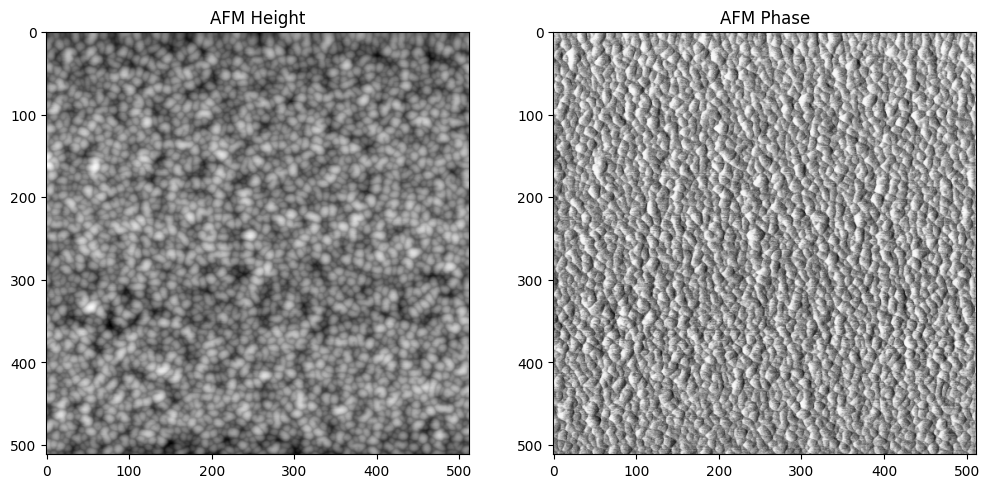

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(height, cmap='gray')
ax[1].imshow(phase, cmap='gray')
ax[0].set_title('AFM Height')
ax[1].set_title('AFM Phase')

So that you can better see details, we will also make smaller sections of the images

Text(0.5, 1.0, 'AFM Phase')

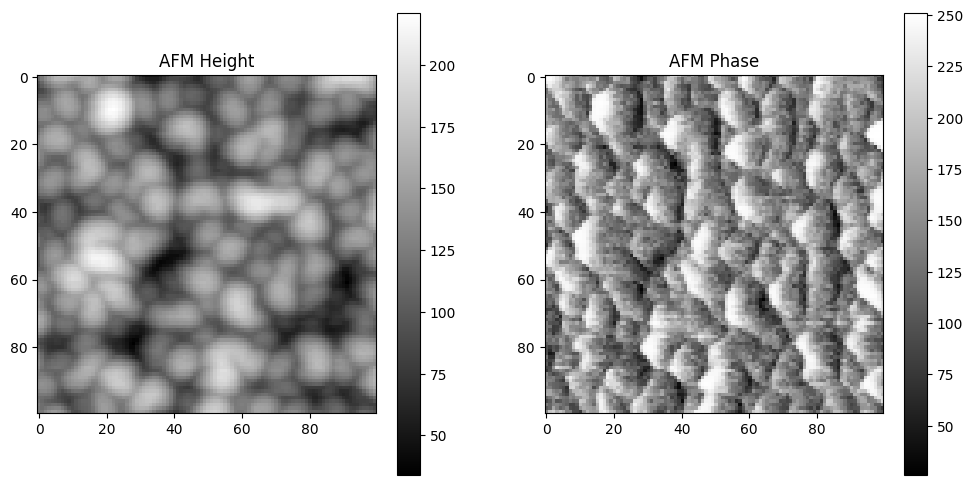

In [9]:
ht_cut = height[100:200, 100:200]
phz_cut = phase[100:200, 100:200]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
cb = ax[0].imshow(ht_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(phz_cut, cmap='gray')
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('AFM Height')
ax[1].set_title('AFM Phase')

### Thresholding & Binary Images - Simple  
Last time we picked an arbitrary value for the threshold filter. As you probably remember, it did not work all that well.

In [10]:
threshed_ht = ht_cut > 100
threshed_phz = phz_cut > 100

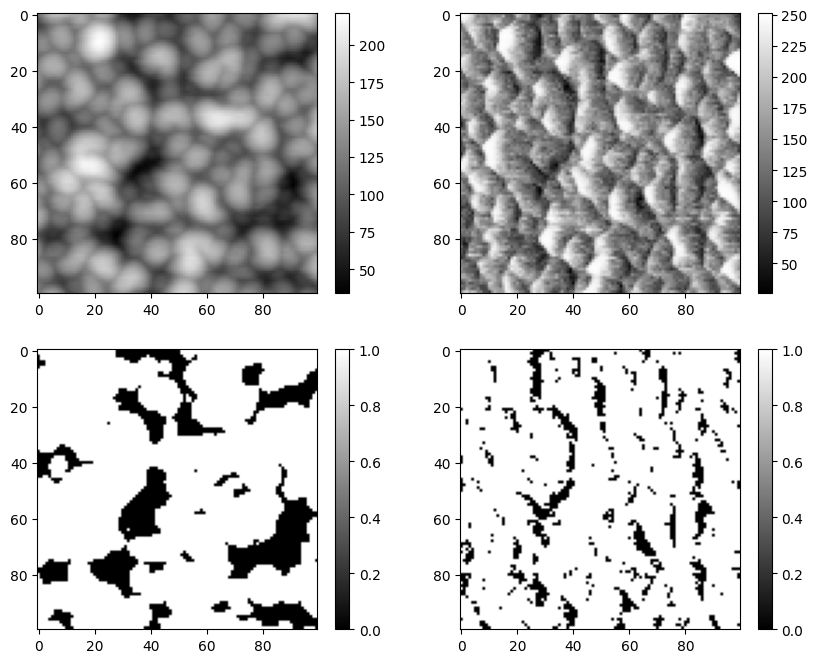

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
# first plot the original images for reference
cb = ax[0,0].imshow(ht_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,0])
cb = ax[0,1].imshow(phz_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,1])
# now plot the thresholded images
cb = ax[1,0].imshow(threshed_ht,cmap='gray')
plt.colorbar(cb,ax=ax[1,0])
cb = ax[1,1].imshow(threshed_phz,cmap='gray')
plt.colorbar(cb,ax=ax[1,1])

### Better thresholding - basic and advanced

#### Basic Global Thresholding (Slide 11)

In [34]:
# 1. Choose an estimate
T_initial = 50
T_initial

50

Text(0.5, 1.0, 'G2')

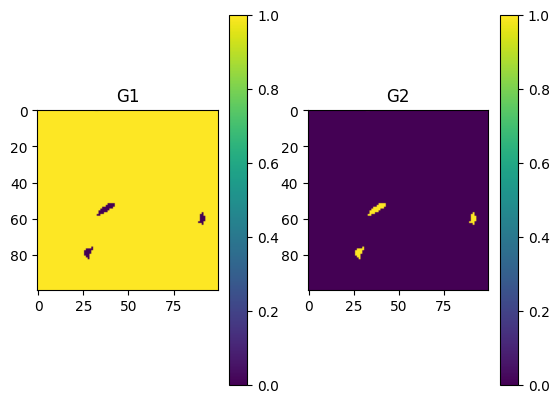

In [29]:
# 2. Segment the Image into G1 and G2
G1 = ht_cut > T_initial
G2 = ht_cut <= T_initial
fig, ax = plt.subplots(1,2)
cb = ax[0].imshow(G1)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(G2)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('G1')
ax[1].set_title('G2')

126.30816470351354 44.44776119402985


Text(0.5, 1.0, 'G2 Pixels (mean 44.45)')

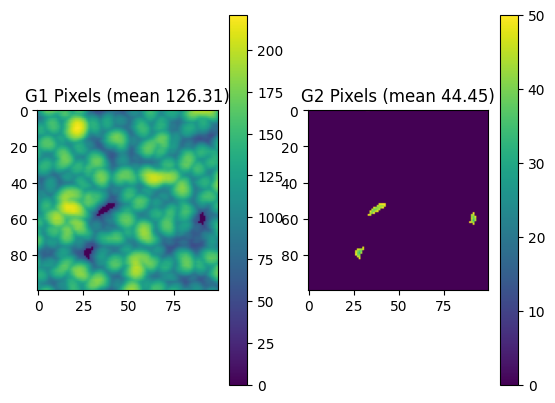

In [30]:
# 3. Compute mean in G1 and G2
mean_G1 = np.mean(ht_cut[G1])
mean_G2 = np.mean(ht_cut[G2])
print(mean_G1, mean_G2)
fig, ax = plt.subplots(1,2)
cb = ax[0].imshow(G1*ht_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(G2*ht_cut)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title(f'G1 Pixels (mean {np.round(mean_G1,2)})')
ax[1].set_title(f'G2 Pixels (mean {np.round(mean_G2,2)})')

In [31]:
# 4. Compute new threshold
T_new = (mean_G1 + mean_G2)/2
print(T_new)

85.3779629487717


In [32]:
# Repeat steps 2-5 with new threshold

Text(0.5, 1.0, 'G2')

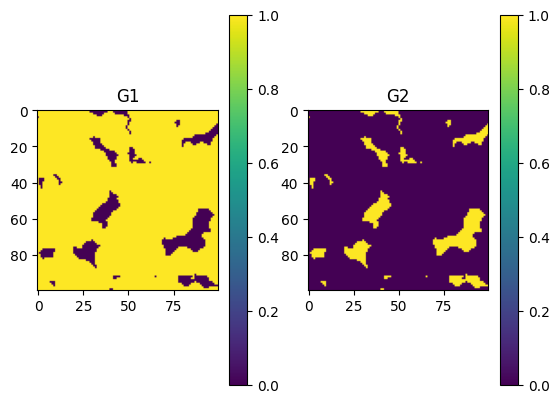

In [35]:
# 2. Segment the Image into G1 and G2
G1 = ht_cut > T_new
G2 = ht_cut <= T_new
fig, ax = plt.subplots(1,2)
cb = ax[0].imshow(G1)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(G2)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('G1')
ax[1].set_title('G2')

131.95969717212202 71.05599214145383


Text(0.5, 1.0, 'G2 Pixels (mean 71.06)')

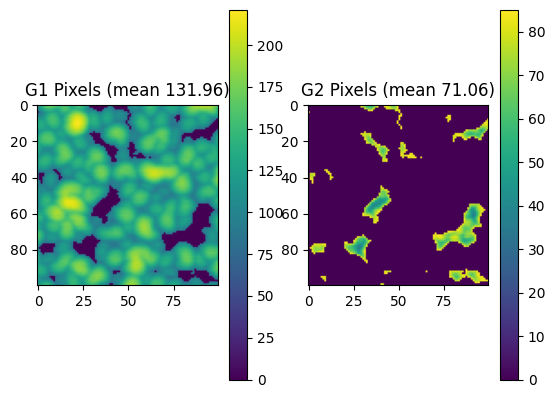

In [36]:
# 3. Compute mean in G1 and G2
mean_G1 = np.mean(ht_cut[G1])
mean_G2 = np.mean(ht_cut[G2])
print(mean_G1, mean_G2)
fig, ax = plt.subplots(1,2)
cb = ax[0].imshow(G1*ht_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(G2*ht_cut)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title(f'G1 Pixels (mean {np.round(mean_G1,2)})')
ax[1].set_title(f'G2 Pixels (mean {np.round(mean_G2,2)})')

In [37]:
# 4. Compute new threshold
T_new = (mean_G1 + mean_G2)/2
print(T_new)

101.50784465678792


Then, you repeat until you reach a predefined termination criterion. Let's put this into a loop:

In [44]:
def global_thresh(array, T_initial, terminate=0.1):
  T_new = T_initial
  while True:
    G1 = array > T_new
    G2 = array <= T_new
    mean_G1 = np.mean(array[G1])
    mean_G2 = np.mean(array[G2])
    T_new = (mean_G1 + mean_G2)/2
    print(T_new)
    if np.abs(T_new - T_initial) < terminate:
      break
    T_initial = T_new

  return T_new

In [45]:
global_thresh(ht_cut,50)

85.3779629487717
101.50784465678792
110.22474248099954
116.13233278696562
119.84966816333736
121.7112108735964
122.86068048980525
123.4695555526149
124.23990449033238
124.91868059476755
124.91868059476755


np.float64(124.91868059476755)

#### Finding the best filter easily - try_all_threshold

In [49]:
from skimage.filters import try_all_threshold

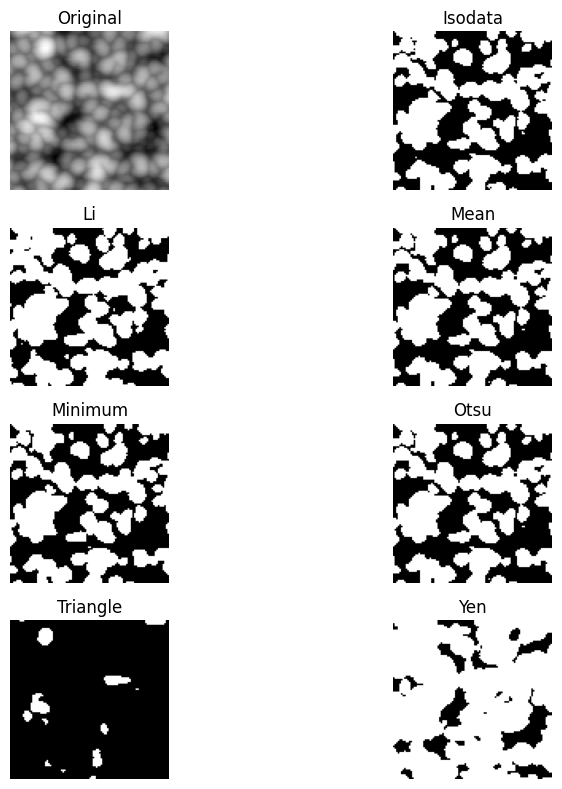

In [50]:
from skimage.filters import try_all_threshold

img = ht_cut

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

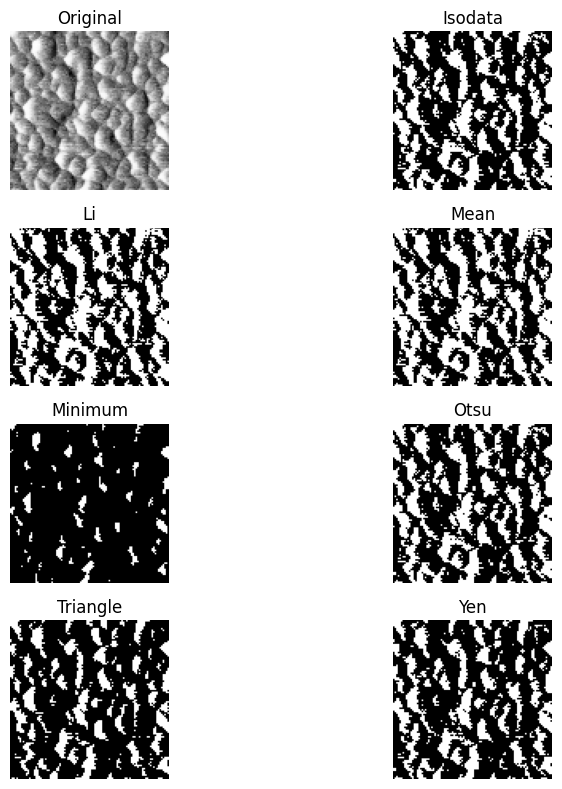

In [51]:

img = phz_cut

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

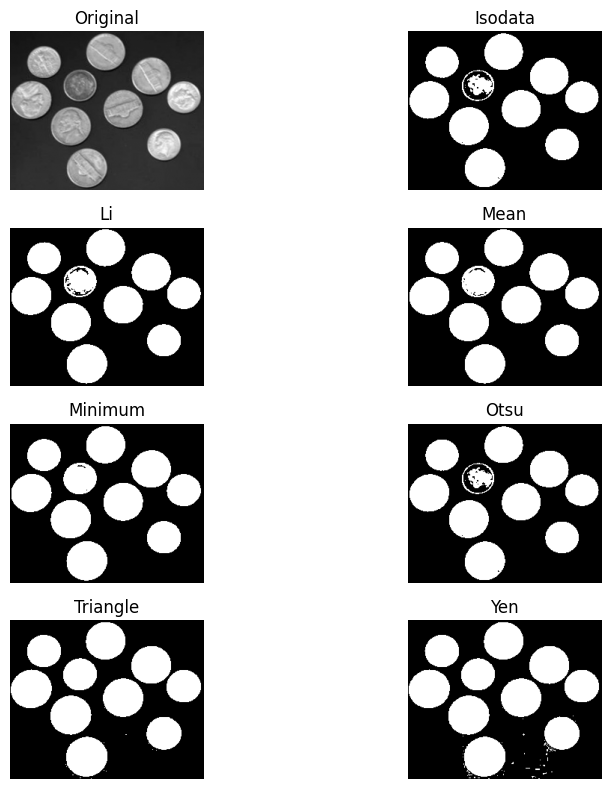

In [55]:
img = coins[:,:,0]

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

## Image Histograms

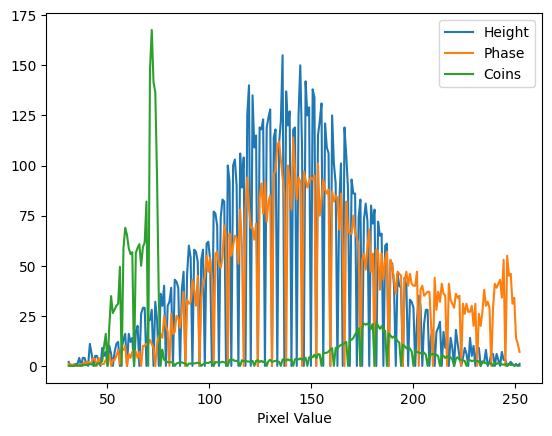

In [70]:
ht_histogram, bin_edges = np.histogram(ht_cut, bins=256)
phz_histogram, bin_edges = np.histogram(phz_cut, bins=256)
c_histogram, bin_edges = np.histogram(coins[:,:,0], bins=256)
plt.plot(bin_edges[0:-1], ht_histogram, label='Height')
plt.plot(bin_edges[0:-1], phz_histogram, label='Phase')
plt.plot(bin_edges[0:-1], c_histogram/20, label='Coins')
plt.xlabel('Pixel Value')
plt.legend()

How could the histogram help with thresholding, or tell us that we will have trouble?

## Calculating gradients

We will be using the Numpy gradient (np.gradient) function for this.

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
cb = ax[0].imshow(phz_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(phz_cut)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(phz_cut)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
plt.plot(np.gradient(phz_cut)[0][:,50])
plt.plot(np.gradient(phz_cut)[0][50])

In [ ]:
plt.plot(np.gradient(phz_cut)[1][:,50])
plt.plot(np.gradient(phz_cut)[1][50])

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
cb = ax[0].imshow(ht_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(ht_cut)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(ht_cut)[1])
plt.colorbar(cb,ax=ax[2])
ax[1].axvline(50,color='r')
ax[1].axhline(50,color='r')
ax[2].axvline(50,color='r')
ax[2].axhline(50,color='r')
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
plt.plot(np.gradient(ht_cut)[0][:,50])
plt.plot(np.gradient(ht_cut)[0][50])

In [ ]:
plt.plot(np.gradient(ht_cut)[1][:,50])
plt.plot(np.gradient(ht_cut)[1][50])

### Combining magnitude of the gradient components

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
cb = ax[0].imshow(ht_cut)
plt.colorbar(cb,ax=ax[0])
gx = np.gradient(ht_cut)[0]
gy = np.gradient(ht_cut)[1]
mag = np.sqrt(gx**2 + gy**2)
cb = ax[1].imshow(mag)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Original')
ax[1].set_title('Magnitude')


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
cb = ax[0].imshow(phz_cut)
plt.colorbar(cb,ax=ax[0])
gx = np.gradient(phz_cut)[0]
gy = np.gradient(phz_cut)[1]
mag = np.sqrt(gx**2 + gy**2)
cb = ax[1].imshow(mag)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Original')
ax[1].set_title('Magnitude')


## Smoothing

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
smooth = ndi.gaussian_filter(phz_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(smooth)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(smooth)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
smooth = ndi.gaussian_filter(ht_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(smooth)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(smooth)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
smooth = ndi.gaussian_filter(phz_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
gx = np.gradient(smooth)[0]
gy = np.gradient(smooth)[1]
mag = np.sqrt(gx**2 + gy**2)
cb = ax[1].imshow(mag)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Original')
ax[1].set_title('Magnitude')

## Threshold this then ROI mask

In [ ]:
newborder_thresh = mag > 25
plt.imshow(newborder_thresh)

In [ ]:
plt.imshow(phz_cut*(1-newborder_thresh))

## Flattening an Image using smoothing

One thing you can do to flatten an image is divide its overall height fluctuations. Take our full AFM height image:

In [ ]:
plt.imshow(height, cmap='gray')

Now let's use a Gaussian filter to smooth out all of the local fluctuations. You may have to experiment with this a bit.

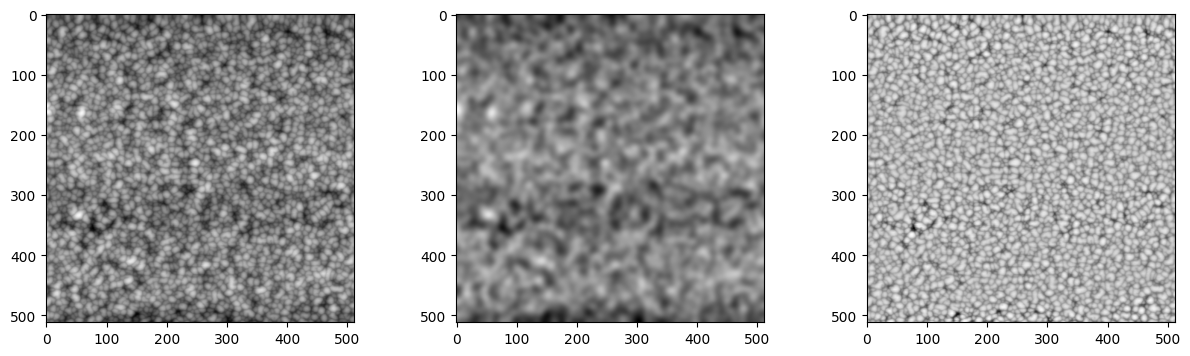

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
cb = ax[0].imshow(height, cmap='gray')
# smooth it out
smooth_height = ndi.gaussian_filter(height,sigma=5)
cb = ax[1].imshow(smooth_height, cmap='gray')
subtracted = height/ smooth_height
cb = ax[2].imshow(subtracted, cmap='gray')

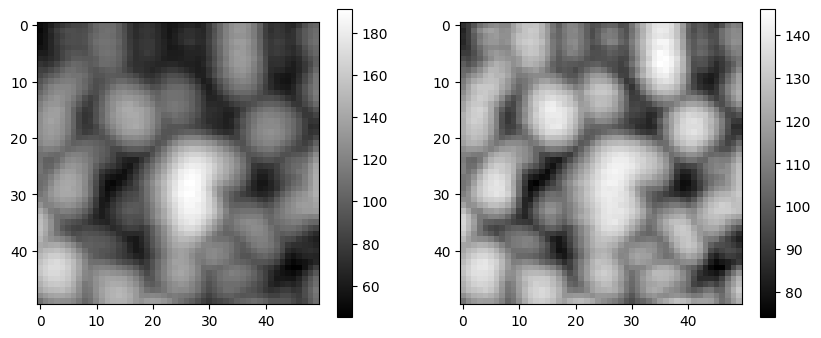

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
cb = ax[0].imshow(height[:50,:50], cmap='gray')
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(smooth_height[:50,:50], cmap='gray')
plt.colorbar(cb,ax=ax[1])
ax[1].imshow(subtracted[:50,:50], cmap='gray')

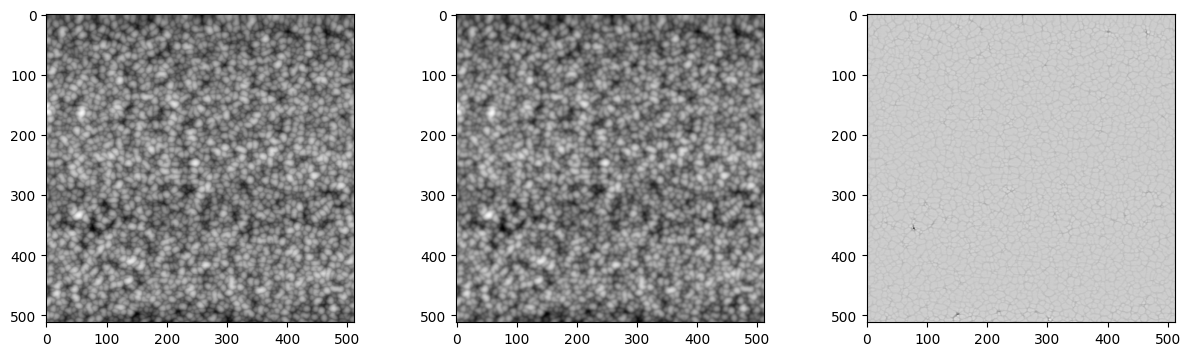

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
cb = ax[0].imshow(height, cmap='gray')
# smooth it out
smooth_height = ndi.gaussian_filter(height,sigma=1)
cb = ax[1].imshow(smooth_height, cmap='gray')
divided = height/smooth_height
cb = ax[2].imshow(divided, cmap='gray')


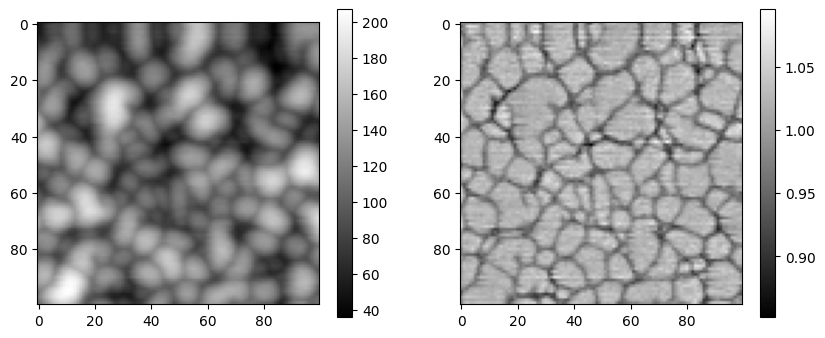

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
cb = ax[0].imshow(height[:100,:100], cmap='gray')
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(smooth_height[:100,:100], cmap='gray')

cb = ax[1].imshow(divided[:100,:100], cmap='gray')
plt.colorbar(cb,ax=ax[1])

## Thresholding - easier with new image

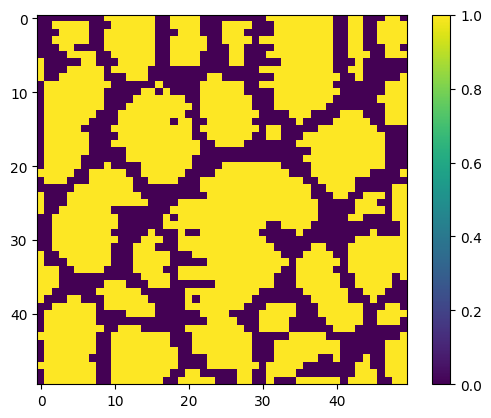

In [96]:
new_thresh = divided > 1
plt.imshow(new_thresh[:50,:50])
plt.colorbar()

## Morphological Operations

In [97]:
import skimage.morphology as morph

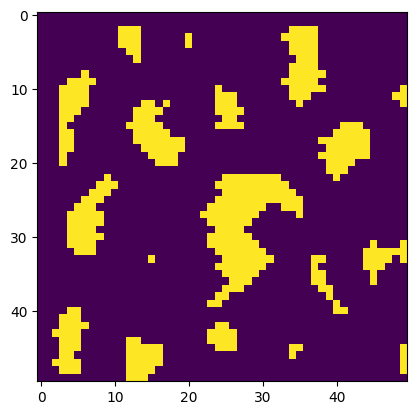

In [102]:
new_thresh2 = ndi.binary_erosion(new_thresh, iterations=2)
plt.imshow(new_thresh2[:50,:50])

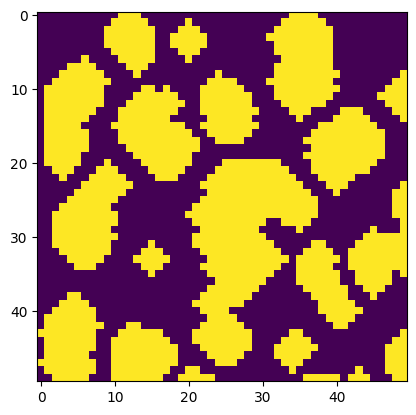

In [104]:
new_thresh3 = ndi.binary_dilation(new_thresh2, iterations=2)
plt.imshow(new_thresh3[:50,:50])

What do you notice about the eroded and dilated regions?